# Newtons Law of Cooling
$$
\frac{dT}{dt}(t) = K[M - T]
$$
where 
where 
T is the temperature of the object at time t, M is the temperature of its surroundings, and K is a constant of proportionality greater than 0. 

A classic example is a hot coffee in a room that is cooler than the temperature of the coffee


In [23]:
from scipy.optimize import fsolve
import numpy as np

def Newton_cool(T, K, M):
    '''
    Newton Cooling ODE function that returns the derivative of temperature with respect to time.

    inputs:
    - T: temperature of the object
    - M: temperature of the surrounding area 
    - K: proportionality constant
    '''
    return K * (M - T)

def true_sol(T0, M, K, t):
    '''
    Exact solution of the Newton's Law of Cooling.

    inputs:
    - T0: initial temperature of the object
    - M: temperature of the surrounding area
    - K: proportionality constant
    - t: time
    '''
    return M + (T0 - M)* np.exp(-K * t)

def backward_euler(func, T0, M, K, TT, h):
    '''
    Approximates the solution of the ODE using the backward Euler method.

    inputs:
    - func: function we want to evaluate (Newton's cooling) 
    - T0: initial temperature
    - M: temperature of the surrounding area
    - K: proportionality constant
    - TT: final time we are time marching til
    - h: time step
    '''
    num_steps = int((TT - 0) / h)
    x = np.zeros(num_steps)
    x[0] = T0
    for i in range(num_steps - 1):
        # Define the implicit function to be solved at each step
        f = lambda y: y - x[i] - h * func(y, K, M)
        x[i + 1] = fsolve(f, x[i])  # x[i] is our initial guess for solving for a value of y that makes f = 0
    return x

def forward_euler(func, T0, M, K, TT, h):
    num_steps = int((TT - 0)/h)
    x = np.zeros((num_steps))
    x[0] = T0
    for i in range(num_steps-1):
        x[i+1] = x[i] + h*func(x[i], K, M)
    return x

# Our Example
T0 = 40  # Initial temperature
M = 25   # Surrounding temperature
K = 2    # Proportionality constant
TT = 10  # Final time
h = 0.01  # Time step

approximate_temperatures_backward = backward_euler(Newton_cool, T0, M, K, TT, h)
approximate_temperatures_forward = forward_euler(Newton_cool, T0, M, K, TT, h)



# Adams-Bashforth and Adams-Moulton
for order 3 AB - 
$$
x_{n+1} = x_n + \frac{h}{12} (23f(t_i,x(t_i)) - 16f(t_{i-1},x(t_{i-1})) + 5f(t_{i-2},x(t_{i-2})))
$$

for order 3 AM - 
$$
x_{n+1} = x_n + \frac{h}{24} (9f(t_{i+1},x(t_{i+1})) + 19f(t_{i},x(t_{i})) - 5f(t_{i-1},x(t_{i-1})) + f(t_{i-2}, x(t_{i-2})))
$$


In [ ]:
from scipy.optimize import fsolve
import numpy as np

def AB3(func, T0, M, K, TT, h):
    '''
    Adams-Bashforth of order 3 method is a linear multistep method using the history points of the ODE to solve the approximation
    '''
    # Initializing the x array to store values of f
    num_steps = int((TT-0)/h)
    x = np.zeros(num_steps)
    x[0] = T0

    for i in range(min(2, num_steps-1)):
        x[i+1] = x[i] + h*func(x[i],K,M)

    for i in range(2, num_steps - 1):
        x[i + 1] = x[i] + h / 12 * (23 * func(x[i], K, M) - 16 * func(x[i - 1], K, M) + 5 * func(x[i - 2], K, M))

    return x


def AM4(func, T0, M, K, TT, h):
    '''
    Adams-Moulton of order 4 solver.
    
    Parameters:
    func: Function representing the differential equation (dy/dt = func(y, K, M))
    T0: Initial value
    M, K: Parameters of the function
    TT: End time
    h: Step size

    Returns:
    Array of values approximating the solution at each step.
    '''
    num_steps = int((TT - 0) / h)
    x = np.zeros(num_steps)
    x[0] = T0

    # Initial steps using a simpler method
    for i in range(min(2, num_steps-1)):
        f = lambda y: y - x[i] - h * func(x[i], K, M)
        x[i+1] = fsolve(f, x[i])

    # Main Adams-Moulton steps
    for i in range(2, num_steps-1):
        f = lambda y: y - x[i] - (h / 24) * (9 * func(y, K, M) + 19 * func(x[i], K, M) - 5 * func(x[i-1], K, M) + func(x[i-2], K, M))
        x[i+1] = fsolve(f, x[i])

    return x

# Our Example
T0 = 40  # Initial temperature
M = 25   # Surrounding temperature
K = 2    # Proportionality constant
TT = 10  # Final time
h = 0.01  # Time step

approx_temps_ab = AB3(Newton_cool, T0, M, K, TT, h)
approx_temps_am = AM4(Newton_cool, T0, M, K, TT, h)

# Plotting the results

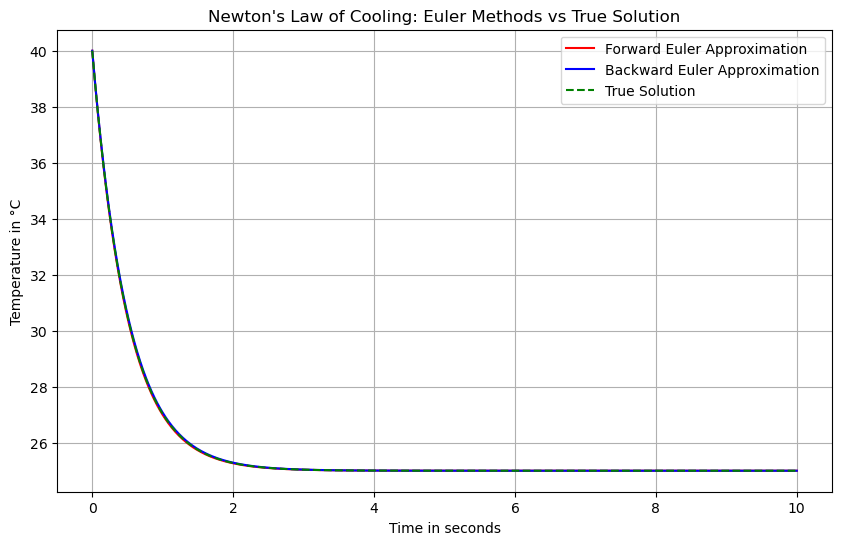

In [24]:
import matplotlib.pyplot as plt

t = np.linspace(0, TT, len(approximate_temperatures_backward))

# Generate true solution data
true_solution = true_sol(T0, M, K, t)

# Plotting
fig, ax = plt.subplot(1,2,figsize=(10, 6))

ax[0](t, approximate_temperatures_forward, color="red", label='Forward Euler Approximation')
ax[0](t, approximate_temperatures_backward, color='blue', label='Backward Euler Approximation')
ax[0](t, true_solution, color='green', linestyle='dashed', label='True Solution')
ax[0].xlabel('Time in seconds')
ax[0].ylabel('Temperature in °C')
ax[0].title('Newton\'s Law of Cooling: Euler Methods vs True Solution')
ax[0].legend()
ax[0].grid(True)
ax[0]

ax[1]
ax[1]